In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
data=yf.download("BTC-USD",start="2025-05-01",end="2026-02-26")

price_series=data['Close']
df=pd.DataFrame(price_series)
df.clumns=['BTC-USD']
df['lag']=df['BTC-USD'].shift(1)
df.dropna(inplace=True)
x=df[['lag']].values
y=df['BTC-USD'].values



/tmp/ipython-input-356/1686591432.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download("BTC-USD",start="2025-05-01",end="2026-02-26")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-356/1686591432.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.clumns=['BTC-USD']


In [3]:
f0=np.mean(y)
y_pred_0=np.full(len(y),f0)
residual_0=y-y_pred_0
print(f"mean:{f0:.2f}")
print(residual_0[:5])

mean:101783.97
[-4873.9002474 -5892.1736849 -7467.9939974 -7035.9158724 -4981.4939974]


In [4]:
from sklearn.tree import DecisionTreeRegressor
tree_1=DecisionTreeRegressor(max_depth=5)
tree_1.fit(x,residual_0)
h1_pred=tree_1.predict(x)
print()
print(h1_pred[:5])


[-5437.6268099  -5437.6268099  -6586.02264323 -6586.02264323
 -6586.02264323]


In [5]:
learning_rate=0.5
y_pred_1=y_pred_0+(learning_rate*h1_pred)
residual_1=y-y_pred_1
print(f"mean error:{np.mean(np.abs(residual_1)):.2f}")
for i in range(5):
  print(f"real price: {y[i]:.2f}|model prediction:{y_pred_1[i]:.2f}")

mean error:6082.87
real price: 96910.07|model prediction:99065.16
real price: 95891.80|model prediction:99065.16
real price: 94315.98|model prediction:98490.96
real price: 94748.05|model prediction:98490.96
real price: 96802.48|model prediction:98490.96


In [6]:
n_trees=500
learning_rate=0.6
y_pred_final=np.full(len(y),np.mean(y))
for i in range (n_trees):
  residual=y-y_pred_final
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(x,residual)
y_pred_final+=learning_rate*tree.predict(x)
print(f"mean:{np.mean(np.abs(y-y_pred_final)):.2f}")
for i in range(-5,0):
  print(f"real price:{y[i]:.2f}|model prediction:{y_pred_final[i]:.2f}")


mean:4909.76
real price:68003.77|model prediction:81113.85
real price:67659.39|model prediction:81113.85
real price:64616.74|model prediction:81113.85
real price:64080.04|model prediction:81113.85
real price:67960.12|model prediction:81113.85


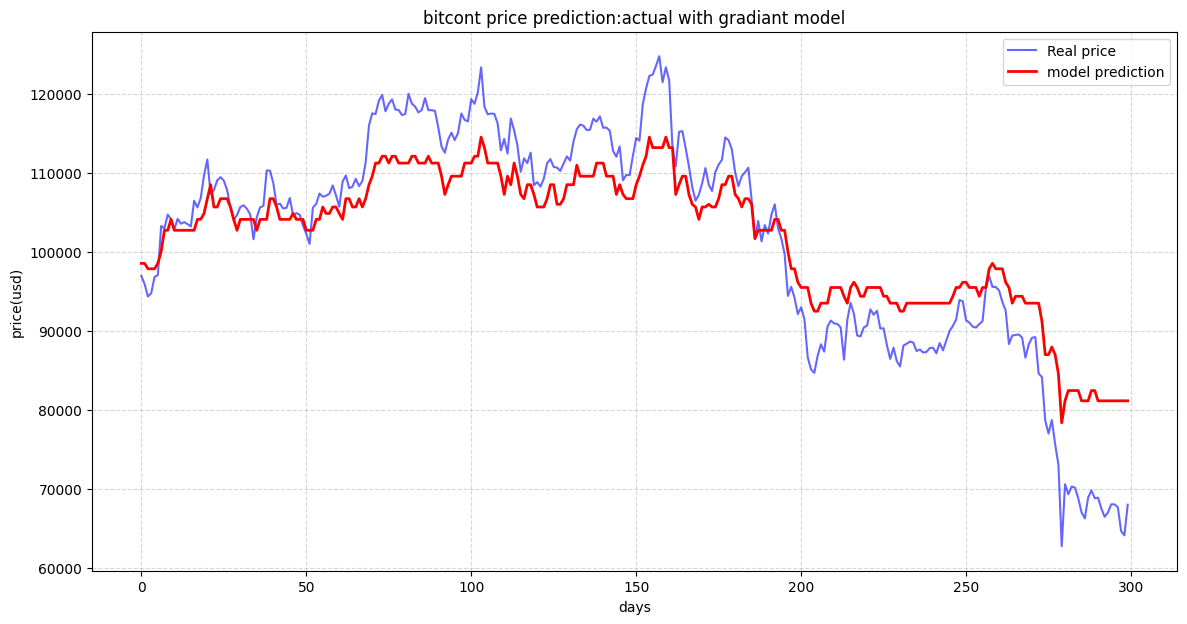

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(y,label='Real price',color='blue',alpha=0.6)
plt.plot(y_pred_final,label='model prediction',color='red',linewidth=2)
plt.title('bitcont price prediction:actual with gradiant model')
plt.xlabel('days')
plt.ylabel('price(usd)')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()